In [8]:
import pandas as pd
import os
import numpy as np
df= pd.read_excel("C:/Users/gulsh/Downloads/Processed.xlsx")
df

,datetime,BC6;,BCRef,ADC0,ADC1,RAWT,RAWH,Humidity,Temperature,ATN_ADC0,ATN_ADC1,ATN_ABS0,ATN_ABS1,BC0,BC1
0,2023-09-29 17:30:00,4866,4.866,11100.450000,10804.500000,2874.950000,4755.150000,47.551500,28.749500,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-29 17:31:00,4757,4.757,11108.350000,10795.750000,2772.350000,5087.150000,50.871500,27.723500,-0.071143,0.081018,0.071143,0.081018,6.692311,7.621200
2,2023-09-29 17:32:00,4552,4.552,11098.300000,10790.700000,2868.850000,4872.200000,48.722000,28.688500,0.090513,0.046789,0.090513,0.046789,8.514460,4.401333
3,2023-09-29 17:33:00,4185,4.185,11091.250000,10785.050000,2916.400000,4678.800000,46.788000,29.164000,0.063543,0.052374,0.063543,0.052374,5.977433,4.926706
4,2023-09-29 17:34:00,4375,4.375,11095.700000,10785.300000,2813.050000,4921.400000,49.214000,28.130500,-0.040114,-0.002318,0.040114,0.002318,3.773432,0.218050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,2023-10-04 14:16:00,0,0.000,800.300000,1104.000000,3274.550000,3188.550000,31.885500,32.745500,0.162307,0.031698,0.162307,0.031698,15.267999,2.981771
7007,2023-10-04 14:17:00,0,0.000,800.333333,1101.333333,3327.333333,3081.333333,30.813333,33.273333,-0.004165,0.241838,0.004165,0.241838,0.391797,22.749339
7008,2023-10-04 14:18:00,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7009,2023-10-04 14:19:00,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import pandas as pd
import os
import numpy as np
df= pd.read_excel("C:/Users/gulsh/Downloads/Processed.xlsx")
# df['time']= df['time'].astype(str)
# df['date']=df['date'].astype(str)
# df['datetime']= pd.to_datetime(df['date']+' '+df['time'])
# df=df.drop(['date','time'],axis=1)
df = df.resample(rule='5Min', on='datetime').mean()
df.to_excel("C:/Users/gulsh/Downloads/pk2_combined_LCS_5Minaverage.xlsx")
# df

In [20]:
df.dtypes

ADC0           float64
ADC1           float64
RAWT           float64
RAWH           float64
Humidity       float64
Temperature    float64
dtype: object

In [1]:
import pandas as pd
import os
import numpy as np
df= pd.read_excel("C:/Users/gulsh/Downloads/Collective PM2.5-1695291084818.xlsx")
df['time']= df['time'].astype(str)
df['date']=df['date'].astype(str)
df['datetime']= pd.to_datetime(df['date']+' '+df['time'])
df=df.drop(['date','time'],axis=1)
# df = df.resample(rule='60Min', on='datetime').mean()
# df.to_excel("C:/Users/gulsh/Downloads/df.xlsx")
df

,Central Workshop,Karakoram,serial number,datetime
0,404.0,NaN,1,2022-11-04 14:15:23
1,411.0,NaN,2,2022-11-04 13:52:52
2,428.0,NaN,3,2022-11-04 13:37:51
3,437.0,NaN,4,2022-11-04 13:22:45
4,431.0,NaN,5,2022-11-04 13:07:49
...,...,...,...,...
6060,36.0,NaN,6061,2022-09-01 13:24:35
6061,40.0,NaN,6062,2022-09-01 13:09:41
6062,36.0,NaN,6063,2022-09-01 12:54:45
6063,39.0,NaN,6064,2022-09-01 12:39:45


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
df= pd.read_excel("C:/Users/gulsh/Downloads/df.xlsx")
#cutting required data timeline from data
d1 = pd.to_datetime("2022-10-01", format="%Y-%m-%d")
d2 =  pd.to_datetime("2022-10-16", format="%Y-%m-%d")
mask = (df.datetime >= d1) & (df.datetime <= d2)
df=df[mask].reset_index(drop=True)
df = df.resample(rule='15Min', on='datetime').mean()
# df.to_excel("C:/Users/gulsh/Downloads/df_uptime.xlsx")
# sns.lineplot(x='datetime',y='Karakoram',data= df, palette='coolwarm')
# sns.lineplot(x='datetime',y='Central Workshop',data= df, palette='coolwarm')

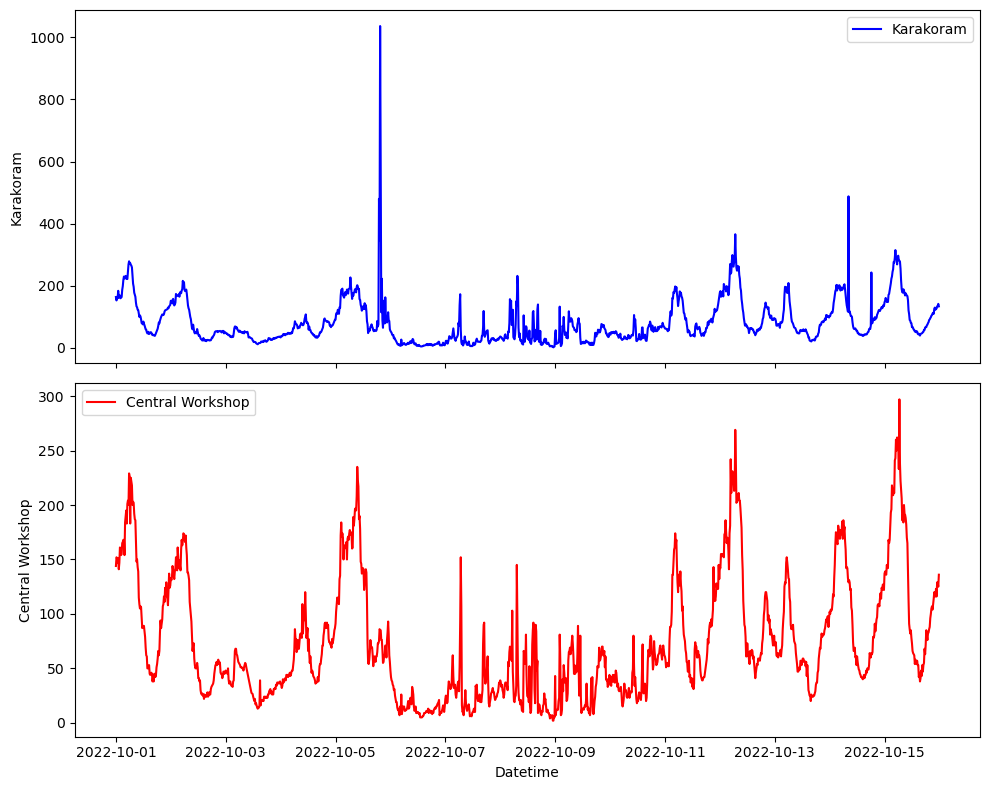

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the first line plot (Karakoram)
sns.lineplot(x='datetime', y='Karakoram', data=df,color="blue", ax=ax[0], label="Karakoram")
ax[0].set_ylabel('Karakoram')

# Plot the second line plot (Central Workshop)
sns.lineplot(x='datetime', y='Central Workshop', data=df, color="red", ax=ax[1],label="Central Workshop")
ax[1].set_ylabel('Central Workshop')

# Set common x-axis label
ax[1].set_xlabel('Datetime')

# Adjust layout
plt.tight_layout()

# Show the plot

plt.savefig('Sensor_network.jpg',dpi=800)
plt.show()

In [ ]:
def ATN()= 100*

In [1]:
import pandas as pd
import os
import numpy as np
df= pd.read_csv("C:/Users/gulsh/Downloads/sensor_data.csv")
df

,Date and Time,Central Workshop,Karakoram
0,11-04-2022 14:15,404.0,NaN
1,11-04-2022 13:52,411.0,NaN
2,11-04-2022 13:37,428.0,NaN
3,11-04-2022 13:22,437.0,NaN
4,11-04-2022 13:07,431.0,NaN
...,...,...,...
6186,08/30/2022 03:43:47 pm,32.0,NaN
6187,08/30/2022 03:28:57 pm,33.0,NaN
6188,08/30/2022 03:07:32 pm,36.0,NaN
6189,08/30/2022 01:22:58 pm,44.0,NaN


In [8]:
import pandas as pd
import os
import numpy as np
df= pd.read_csv("C:/Users/gulsh/Downloads/sensor_data.csv")
df['Date and Time']= pd.to_datetime(df['Date and Time'])
df.to_excel("C:/Users/gulsh/Downloads/sensor_data_corrected.xlsx", index= False)

In [55]:
import pandas as pd
import os
import numpy as np
import plotly.express as px
from dateutil import parser
df= pd.read_csv("C:/Users/gulsh/Downloads/df.csv")
df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')
# df = df.resample(rule='60Min', on='Date and Time').mean()
# fig= px.line(df,x='Date and Time',y=['Central Workshop','Karakoram'])
# df.to_excel("C:/Users/gulsh/Downloads/sensor_data_corrected_hourly.xlsx")


# Display the DataFrame
fig= px.line(df,x='datetime',y=['Central Workshop','Karakoram'])
fig.show()
df

,datetime,Central Workshop,Karakoram
0,2022-04-11,404.0,NaN
1,2022-04-11,411.0,NaN
2,2022-04-11,428.0,NaN
3,2022-04-11,437.0,NaN
4,2022-04-11,431.0,NaN
...,...,...,...
6186,2022-08-30,32.0,NaN
6187,2022-08-30,33.0,NaN
6188,2022-08-30,36.0,NaN
6189,2022-08-30,44.0,NaN


In [76]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
df= pd.read_excel("C:/Users/gulsh/Downloads/Collective PM2.5-1695291084818.xlsx")
df.replace('None',np.nan, inplace=True)
df['time']= df['time'].astype(str)
df['date']=df['date'].astype(str)
df['datetime']= pd.to_datetime(df['date']+' '+df['time'])
df=df.drop(['date','time'],axis=1)
df['datetime']= df['datetime'].astype(str)
converted_datetime_values = []
for value in df['datetime']:
    try:
        dt_obj = datetime.strptime(value, '%Y-%m-%d %H:%M')
        converted_datetime_values.append(dt_obj.strftime('%Y-%m-%d %H:%M'))
    except ValueError:
        try:
            dt_obj = datetime.strptime(value, '%Y-%m-%d %I:%M %p')
            converted_datetime_values.append(dt_obj.strftime('%Y-%m-%d %H:%M'))
        except ValueError:
            converted_datetime_values.append('Invalid datetime format')

# Replace the datetime column with the converted values
df['datetime'] = converted_datetime_values

# Display the updated DataFrame
print(df)
# df = df.resample(rule='60Min', on='datetime').mean()
# df.to_excel("C:/Users/gulsh/Downloads/df1.xlsx",index=False)


      Central Workshop  Karakoram                 datetime
0                404.0        NaN  Invalid datetime format
1                411.0        NaN  Invalid datetime format
2                428.0        NaN  Invalid datetime format
3                437.0        NaN  Invalid datetime format
4                431.0        NaN  Invalid datetime format
...                ...        ...                      ...
6060              36.0        NaN  Invalid datetime format
6061              40.0        NaN  Invalid datetime format
6062              36.0        NaN  Invalid datetime format
6063              39.0        NaN  Invalid datetime format
6064              33.0        NaN  Invalid datetime format

[6065 rows x 3 columns]


In [73]:
fig= px.line(df,x='datetime',y=['Central Workshop','Karakoram'])
fig.show()


In [31]:
df.describe()

,Central Workshop,Karakoram
count,1415.000000,1438.000000
mean,72.927208,81.252434
std,55.299685,71.200235
min,2.000000,2.000000
25%,31.000000,33.000000
50%,57.000000,58.000000
75%,100.000000,111.000000
max,297.000000,1036.000000


In [25]:
import pandas as pd
import os
import numpy as np

#cutting required data timeline from data
# input dezired starting date and end date
d1 = pd.to_datetime("2022-09-23", format="%Y-%m-%d")
d2 =  pd.to_datetime("2023-09-24", format="%Y-%m-%d")

# loading the dataset, sometime XLXS file will give wrong datetime, then use csv file
df = pd.read_excel("D:/air quality/OneDrive - design.iitd.ac.in/Desktop/22sep2023/Quest_BAM/quest_bam.xlsx")

# sometimes the data contains None, converting them into NaN because python can easily hansle NaN
df.replace(0,np.nan, inplace=True)
df.replace('None',np.nan, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])
# df["datetime"] = pd.to_datetime(df["datetime"], format="%d-%m-%Y %H:%M")
# df[df.columns[1:]] = df[df.columns[1:]].astype("float64")
mask = (df.datetime >= d1) & (df.datetime <= d2)
df=df[mask].reset_index(drop=True)

# df.to_excel("D:/air quality/OneDrive - design.iitd.ac.in/Desktop/22sep2023/Quest_BAM/quest_bam_cleaned.xlsx",index=False)
df

,datetime,reference,temperature,humidity,pressure,filter_temperature,filter_humidity
0,2022-09-23 18:00:00,NaN,24.3,94,732.1,NaN,NaN
1,2022-09-23 19:00:00,24.0,24.4,95,732.1,38.0,48.0
2,2022-09-23 20:00:00,32.2,24.5,95,732.0,38.8,45.0
3,2022-09-23 21:00:00,33.7,24.6,96,732.1,39.6,44.0
4,2022-09-23 22:00:00,43.3,24.7,96,732.2,40.4,42.0
...,...,...,...,...,...,...,...
6921,2023-09-23 11:00:00,30.7,33.3,67,736.4,45.2,35.0
6922,2023-09-23 12:00:00,33.2,34.2,63,735.9,45.3,35.0
6923,2023-09-23 13:00:00,34.9,31.2,75,735.3,46.7,36.0
6924,2023-09-23 14:00:00,12.2,24.6,91,735.8,42.7,34.0


In [26]:
fig= px.line(df,x='datetime',y=['filter_humidity','humidity','reference'])
fig.show()

<Axes: xlabel='datetime', ylabel='filter_humidity'>

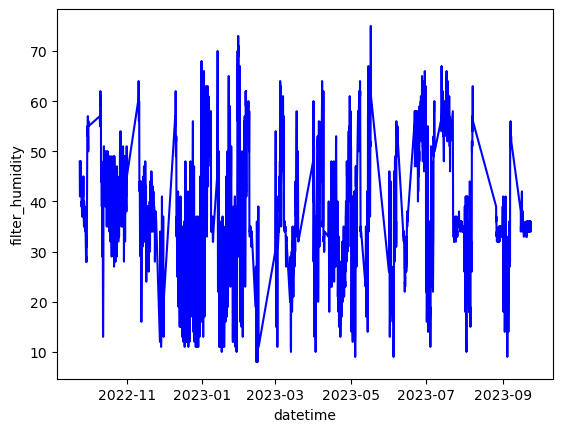

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
# fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the first line plot (Karakoram)
sns.lineplot(x='datetime', y='filter_humidity', data=df,color="blue")
# ax[0].set_ylabel('Karakoram')

In [13]:
import pandas as pd

# Load your data (replace 'your_data.csv' with your actual file path)
data = pd.read_excel("C:/Users/gulsh/Downloads/pk2_datetime.xlsx")

# df['time']= df['time'].astype(str)
# df['date']=df['date'].astype(str)
# df['datetime']= pd.to_datetime(df['date']+' '+df['time'])
# df=df.drop(['date','time'],axis=1)
# df.to_excel("C:/Users/gulsh/Downloads/pk2_datetime.xlsx")
# # Function to find the closest timestamp, favoring exact hour timestamps
def closest_hour(hour, timestamps):
    exact_hour = timestamps[timestamps.dt.minute == 0]
    if not exact_hour.empty:
        return exact_hour.iloc[0]
    return min(timestamps, key=lambda x: abs((x.hour - hour) * 60 + x.minute))

# Iterate over unique hours and find the closest data for each hour
filtered_data = pd.DataFrame()
unique_hours = data['datetime'].dt.hour.unique()

for hour in unique_hours:
    hour_data = data[data['datetime'].dt.hour == hour]
    closest_timestamp = closest_hour(hour, hour_data['datetime'])
    closest_data = hour_data[hour_data['datetime'] == closest_timestamp]
    filtered_data = filtered_data.append(closest_data)

# Print the resulting filtered data
print(filtered_data)


                 datetime   ADC0   ADC1  RAWT  RAWH  Humidity  Temperature
21811 2023-09-30 11:00:02   5043   5465  3287  4402     44.02        32.87
26575 2023-09-30 15:00:00   4724   5156  3291  3017     30.17        32.91
372   2023-09-29 16:00:00  11172  10861  3046  4216     42.16        30.46
28957 2023-09-30 17:00:00   4626   5065  3177  3646     36.46        31.77
1564  2023-09-29 18:00:00  10942  10655  3202  4579     45.79        32.02
2753  2023-09-29 19:00:01  10567  10351  3434  4118     41.18        34.34
3942  2023-09-29 20:00:00  10205  10080  3337  4539     45.39        33.37
5134  2023-09-29 21:00:00   9835   9769  3375  4766     47.66        33.75
6326  2023-09-29 22:00:00   9447   9441  3393  4499     44.99        33.93
7518  2023-09-29 23:00:00   9057   9078  3525  4444     44.44        35.25
8710  2023-09-30 00:00:01   8686   8749  3536  4369     43.69        35.36
9901  2023-09-30 01:00:00   8285   8401  3522  4180     41.80        35.22
11092 2023-09-30 02:00:00

In [20]:
import pandas as pd

# Load your data (replace 'your_data.csv' with your actual file path)
df = pd.read_excel("C:/Users/gulsh/Downloads/pk2_datetime.xlsx")

# Convert the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Function to find the closest timestamp for each hour in a month
def closest_timestamp(hour_data):
    target_hour = hour_data['hour'].iloc[0]  # Target hour for filtering
    target_month = hour_data['month'].iloc[0]  # Target month for filtering

    # Filter data for the target month
    month_data = hour_data[hour_data['datetime'].dt.month == target_month]

    # Find the closest timestamp for the target hour
    closest_time = min(month_data['datetime'], key=lambda x: abs(x.hour - target_hour))

    # Return the data for the closest timestamp
    return month_data[month_data['datetime'] == closest_time]

# Extract hour and month from the 'datetime' column
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

# Group by month and hour, then apply the closest_timestamp function
filtered_data = df.groupby(['month', 'hour']).apply(closest_timestamp).reset_index(drop=True)

# Print the resulting filtered data
# filtered_data.to_excel("C:/Users/gulsh/Downloads/pk2_datetime_filtered.xlsx")
filtered_data

,datetime,ADC0,ADC1,RAWT,RAWH,Humidity,Temperature,hour,month
0,2023-09-30 00:00:01,8686,8749,3536,4369,43.69,35.36,0,9
1,2023-09-30 01:00:00,8285,8401,3522,4180,41.80,35.22,1,9
2,2023-09-30 02:00:00,7836,8031,3483,4446,44.46,34.83,2,9
3,2023-09-30 03:00:02,7449,7659,3382,4707,47.07,33.82,3,9
4,2023-09-30 04:00:01,7046,7322,3386,4734,47.34,33.86,4,9
5,2023-09-30 05:00:01,6693,6975,3400,4599,45.99,34.00,5,9
6,2023-09-30 06:00:00,6325,6642,3507,4278,42.78,35.07,6,9
7,2023-09-30 07:00:00,6025,6357,3518,4539,45.39,35.18,7,9
8,2023-09-30 08:00:00,5764,6117,3489,4266,42.66,34.89,8,9
9,2023-09-30 09:00:00,5481,5878,3346,4860,48.60,33.46,9,9


In [21]:
import pandas as pd

# Load your data (replace 'your_data.csv' with your actual file path)
df = pd.read_excel("C:/Users/gulsh/Downloads/pk2_datetime.xlsx")


# Convert the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Function to find the closest timestamp for each hour in a day
def closest_timestamp(hour_data):
    target_hour = hour_data['hour'].iloc[0]  # Target hour for filtering
    target_day = hour_data['day'].iloc[0]  # Target day for filtering

    # Filter data for the target day
    day_data = hour_data[hour_data['datetime'].dt.day == target_day]

    # Find the closest timestamp for the target hour
    closest_time = min(day_data['datetime'], key=lambda x: abs(x.hour - target_hour) * 60 + abs(x.minute))

    # Add a new column 'closest_datetime' with the closest timestamp
    day_data['closest_datetime'] = closest_time

    # Return the data for the closest timestamp
    return day_data[['closest_datetime']]

# Extract hour, minute, and day from the 'datetime' column
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['day'] = df['datetime'].dt.day

# Group by day and hour, then apply the closest_timestamp function
filtered_data = df.groupby(['day', 'hour']).apply(closest_timestamp).reset_index(drop=True)

# Print the resulting filtered 'closest_datetime'
print(filtered_data['closest_datetime'])


0        2023-09-29 11:28:43
1        2023-09-29 11:28:43
2        2023-09-29 15:41:22
3        2023-09-29 15:41:22
4        2023-09-29 15:41:22
                 ...        
140043   2023-10-04 14:00:00
140044   2023-10-04 14:00:00
140045   2023-10-04 14:00:00
140046   2023-10-04 14:00:00
140047   2023-10-04 14:00:00
Name: closest_datetime, Length: 140048, dtype: datetime64[ns]


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. Read the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# 2. Divide the humidity_cbam data into bins
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False, include_lowest=True)

# Define the LCS columns
lcs_columns = ['GPCS001', 'GPCS002', 'GPCS003', 'GPCS004', 'GPCS005', 'GPCS006', 'GPCS007', 'GPCS008', 'GPCS009']

# 3. Perform regression for each humidity bin and LCS and calculate R2 and p-values
results_humidity_bins = {
    'LCS': [],
    'Humidity Bin': [],
    'R2': [],
    'Temp P-value': [],
    'Humidity P-value': []
}
for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs, 'temp_cbam', 'humidity_cbam'])
        if len(subset) > 1:
            X = subset[[lcs, 'temp_cbam', 'humidity_cbam']]
            X = sm.add_constant(X)
            y = subset['cbam']
            model = sm.OLS(y, X).fit()
            results_humidity_bins['LCS'].append(lcs)
            results_humidity_bins['Humidity Bin'].append(humidity_range)
            results_humidity_bins['R2'].append(model.rsquared)
            results_humidity_bins['Temp P-value'].append(model.pvalues['temp_cbam'])
            results_humidity_bins['Humidity P-value'].append(model.pvalues['humidity_cbam'])
results_df_humidity_bins = pd.DataFrame(results_humidity_bins)

# 4. Reorganize the results into a compact multi-index DataFrame
columns = pd.MultiIndex.from_product([lcs_columns, ['Temp P-value', 'Humidity P-value']])
compact_df = pd.DataFrame(index=humidity_labels, columns=columns)
for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        row = results_df_humidity_bins[(results_df_humidity_bins['LCS'] == lcs) & 
                                       (results_df_humidity_bins['Humidity Bin'] == humidity_range)]
        if not row.empty:
            compact_df.loc[humidity_range, (lcs, 'Temp P-value')] = row['Temp P-value'].values[0]
            compact_df.loc[humidity_range, (lcs, 'Humidity P-value')] = row['Humidity P-value'].values[0]

compact_df.to_excel("compact_df.xlsx")

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. Read the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# 1. Adjust the temperature bins
temperature_bins = [0, 10, 20, 30]
temperature_labels = ["0-10", "10-20", "20-30"]
data['temperature_bin'] = pd.cut(data['temp_cbam'], bins=temperature_bins, labels=temperature_labels, right=False)

# 2. & 3. Perform regression for each temperature bin and LCS, calculate p-values, and count data points
results_temperature_bins = {
    'LCS': [],
    'Temperature Bin': [],
    'Temp P-value': [],
    'Humidity P-value': [],
    'Data Points': []
}
for lcs in lcs_columns:
    for temp_range in temperature_labels:
        subset = data[data['temperature_bin'] == temp_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        # Count data points for cbam and LCS pair
        data_points = len(subset)
        
        subset = subset.dropna(subset=['temp_cbam', 'humidity_cbam'])
        
        if len(subset) > 1:
            X = subset[[lcs, 'temp_cbam', 'humidity_cbam']]
            X = sm.add_constant(X)
            y = subset['cbam']
            model = sm.OLS(y, X).fit()
            results_temperature_bins['LCS'].append(lcs)
            results_temperature_bins['Temperature Bin'].append(temp_range)
            results_temperature_bins['Temp P-value'].append(model.pvalues['temp_cbam'])
            results_temperature_bins['Humidity P-value'].append(model.pvalues['humidity_cbam'])
            results_temperature_bins['Data Points'].append(data_points)

results_df_temperature_bins = pd.DataFrame(results_temperature_bins)

# 4. Reorganize the results into a compact table
columns = pd.MultiIndex.from_product([lcs_columns, ['Temp P-value', 'Humidity P-value', 'Data Points']])
compact_temp_df = pd.DataFrame(index=temperature_labels, columns=columns)
for lcs in lcs_columns:
    for temp_range in temperature_labels:
        row = results_df_temperature_bins[(results_df_temperature_bins['LCS'] == lcs) & 
                                          (results_df_temperature_bins['Temperature Bin'] == temp_range)]
        if not row.empty:
            compact_temp_df.loc[temp_range, (lcs, 'Temp P-value')] = row['Temp P-value'].values[0]
            compact_temp_df.loc[temp_range, (lcs, 'Humidity P-value')] = row['Humidity P-value'].values[0]
            compact_temp_df.loc[temp_range, (lcs, 'Data Points')] = row['Data Points'].values[0]

compact_temp_df

GPCS001                                   GPCS002                   \
      Temp P-value Humidity P-value Data Points Temp P-value Humidity P-value   
0-10      0.000633         0.685551         235     0.000537         0.549906   
10-20     0.645377          0.00674        1800     0.027611         0.001999   
20-30          0.0         0.002594         601     0.000001         0.020509   

                       GPCS003                                   GPCS004  ...  \
      Data Points Temp P-value Humidity P-value Data Points Temp P-value  ...   
0-10          235          0.0         0.000276         235     0.068179  ...   
10-20        1793          0.0         0.182938        1732          0.0  ...   
20-30         608     0.141435         0.000552         556     0.000483  ...   

          GPCS006      GPCS007                                   GPCS008  \
      Data Points Temp P-value Humidity P-value Data Points Temp P-value   
0-10          162     0.004744         0.654508         222     0.010285   
10-20        1660          0.0              0.0        1837     0.730107   
20-30         590     0.000021         0.000048         615     0.000059   

                                        GPCS009                               
      Humidity P-value Data Points Temp P-value Humidity P-value Data Points  
0-10          0.141029         226     0.004493         0.000282         235  
10-20              0.0        1832      0.35666              0.0        1835  
20-30         0.000768         621     0.000247         0.001982         614  

[3 rows x 27 columns]

In [16]:
# MAE for each bin of humidity
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. Read the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")
# Define the humidity bins and labels
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False, include_lowest=True)

# Calculate MAE for each humidity bin and LCS
mae_results = {
    'LCS': [],
    'Humidity Bin': [],
    'MAE': []
}

for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            actual = subset['cbam']
            predicted = subset[lcs]
            mae = mean_absolute_error(actual, predicted)
            
            mae_results['LCS'].append(lcs)
            mae_results['Humidity Bin'].append(humidity_range)
            mae_results['MAE'].append(mae)

mae_df = pd.DataFrame(mae_results)
mae_df = pd.DataFrame(index=lcs_columns, columns=humidity_labels)

for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            actual = subset['cbam']
            predicted = subset[lcs]
            mae = mean_absolute_error(actual, predicted)
            
            mae_df.loc[lcs, humidity_range] = mae

mae_df


,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100
GPCS001,NaN,NaN,5.368333,15.273246,30.999046,52.553195,70.393124,85.639149,110.829807,77.849226
GPCS002,NaN,NaN,5.36,15.005702,31.733073,55.702653,75.664901,93.255658,118.375095,77.152447
GPCS003,NaN,NaN,13.363333,15.651688,29.633372,44.716033,59.119211,69.849041,67.305656,27.894167
GPCS004,NaN,NaN,16.011667,20.633122,29.389459,40.250242,53.433233,70.836232,100.803232,98.478354
GPCS005,NaN,NaN,15.536667,25.971644,34.410342,49.746822,67.365101,101.752066,137.2522,109.902304
GPCS006,NaN,NaN,12.886667,15.411429,22.207974,31.384514,42.469893,57.734156,71.723871,58.236876
GPCS007,NaN,NaN,41.67,49.076793,65.215284,86.99842,100.737258,110.587085,129.63416,98.240783
GPCS008,NaN,NaN,49.695,63.244627,85.182797,113.28901,135.726677,152.198556,188.93275,155.414654
GPCS009,NaN,NaN,81.845,93.147468,116.974504,150.572846,178.069113,200.987649,238.84231,220.12246


In [17]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the temperature bins and labels
temperature_bins = list(range(0, 31, 5))
temperature_labels = [f"{i}-{i+5}" for i in temperature_bins[:-1]]
data['temperature_bin'] = pd.cut(data['temp_cbam'], bins=temperature_bins, labels=temperature_labels, right=False)

# Define the LCS columns
lcs_columns = ['GPCS001', 'GPCS002', 'GPCS003', 'GPCS004', 'GPCS005', 'GPCS006', 'GPCS007', 'GPCS008', 'GPCS009']

# Calculate MAE for each temperature bin and LCS and reorganize the results

# Initialize a DataFrame to store MAE values with LCS as rows and temperature bins as columns
mae_temp_df = pd.DataFrame(index=lcs_columns, columns=temperature_labels)

for lcs in lcs_columns:
    for temp_range in temperature_labels:
        subset = data[data['temperature_bin'] == temp_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            actual = subset['cbam']
            predicted = subset[lcs]
            mae = mean_absolute_error(actual, predicted)
            
            mae_temp_df.at[lcs, temp_range] = mae

print(mae_temp_df)


         0-5        5-10       10-15       15-20       20-25       25-30
GPCS001  NaN  107.215319   89.867453   83.854992    54.81546   43.911145
GPCS002  NaN   106.85078   93.403214   93.610938   59.728444   48.458039
GPCS003  NaN   26.753688   51.197715   76.784031   45.096507    38.81723
GPCS004  NaN  103.608621   91.332109   66.986826   43.343856   36.172578
GPCS005  NaN  143.163201   129.27739   86.889632   46.669647   29.239775
GPCS006  NaN   66.895936   65.327222   54.543046   33.980742   27.234302
GPCS007  NaN  104.678604  109.972963  114.035798   90.432113   83.780604
GPCS008  NaN  176.104204  163.832314  152.551935  117.124539  111.429832
GPCS009  NaN  230.048723   213.21547  199.630084  156.181151   147.35614


In [19]:
# SD calculation for gruop of sensors based on humidity bins
import pandas as pd
import numpy as np

data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the humidity bins and labels
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False)

# Define the groups of identical LCS sensors
sensor_groups = {
    'Group1': ['GPCS001', 'GPCS002'],
    'Group2': ['GPCS004', 'GPCS005', 'GPCS006'],
    'Group3': ['GPCS007', 'GPCS008', 'GPCS009']
}

# Calculate the corrected SD for each humidity bin and for each group of identical LCS sensors using the provided formula

results_corrected_sd = pd.DataFrame(index=humidity_labels + ['Overall'], columns=sensor_groups.keys())

# Compute the corrected SD for each humidity bin
for group_name, sensors in sensor_groups.items():
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam'] + sensors)
        
        if len(subset) > 0:
            N = len(subset)
            M = len(sensors)
            
            # Compute mean for each day
            day_means = subset[sensors].mean(axis=1)
            
            # Compute squared differences and sum them
            squared_diff_sum = np.sum((subset[sensors].subtract(day_means, axis=0))**2).sum()
            
            # Calculate corrected SD using the formula
            corrected_sd = np.sqrt(squared_diff_sum / ((N * M) - 1))
            
            results_corrected_sd.at[humidity_range, group_name] = corrected_sd

# Compute the corrected SD for the overall data (without binning by humidity)
for group_name, sensors in sensor_groups.items():
    subset = data.dropna(subset=['cbam'] + sensors)
    
    N = len(subset)
    M = len(sensors)
    
    # Compute mean for each day
    day_means = subset[sensors].mean(axis=1)
    
    # Compute squared differences and sum them
    squared_diff_sum = np.sum((subset[sensors].subtract(day_means, axis=0))**2).sum()
    
    # Calculate corrected SD using the formula
    corrected_sd = np.sqrt(squared_diff_sum / ((N * M) - 1))
    
    results_corrected_sd.at['Overall', group_name] = corrected_sd

print(results_corrected_sd)


            Group1     Group2     Group3
0-10           NaN        NaN        NaN
10-20          NaN        NaN        NaN
20-30     0.668993   4.119678  18.625065
30-40     1.114965   6.494997  20.044457
40-50     6.214295   9.922958  23.584422
50-60     8.566338  16.203745  29.613119
60-70     6.261756  21.505953  38.423796
70-80    11.829305  30.892386  43.453542
80-90    13.638649  40.038792  50.681503
90-100    8.527041  32.812336  54.906652
Overall  10.753627  30.626169  43.607599


In [21]:
# cv calculation for gruop of sensors based on humidity bins
import pandas as pd
import numpy as np

data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the humidity bins and labels
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False)

# Define the groups of identical LCS sensors
sensor_groups = {
    'Group1': ['GPCS001', 'GPCS002'],
    'Group2': ['GPCS004', 'GPCS005', 'GPCS006'],
    'Group3': ['GPCS007', 'GPCS008', 'GPCS009']
}

# Calculate the CV for each humidity bin and for each group of identical LCS sensors using the provided formula

results_cv = pd.DataFrame(index=humidity_labels + ['Overall'], columns=sensor_groups.keys())

# Compute the CV for each humidity bin
for group_name, sensors in sensor_groups.items():
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam'] + sensors)
        
        if len(subset) > 0:
            N = len(subset)
            M = len(sensors)
            
            # Compute mean for each day
            day_means = subset[sensors].mean(axis=1)
            
            # Compute overall mean for the group
            group_mean = day_means.mean()
            
            # Compute squared differences and sum them
            squared_diff_sum = np.sum((subset[sensors].subtract(day_means, axis=0))**2).sum()
            
            # Calculate corrected SD using the formula
            corrected_sd = np.sqrt(squared_diff_sum / ((N * M) - 1))
            
            # Calculate CV using the formula
            cv = (corrected_sd / group_mean) * 100
            
            results_cv.at[humidity_range, group_name] = cv

# Compute the CV for the overall data (without binning by humidity)
for group_name, sensors in sensor_groups.items():
    subset = data.dropna(subset=['cbam'] + sensors)
    
    N = len(subset)
    M = len(sensors)
    
    # Compute mean for each day
    day_means = subset[sensors].mean(axis=1)
    
    # Compute overall mean for the group
    group_mean = day_means.mean()
    
    # Compute squared differences and sum them
    squared_diff_sum = np.sum((subset[sensors].subtract(day_means, axis=0))**2).sum()
    
    # Calculate corrected SD using the formula
    corrected_sd = np.sqrt(squared_diff_sum / ((N * M) - 1))
    
    # Calculate CV using the formula
    cv = (corrected_sd / group_mean) * 100
    
    results_cv.at['Overall', group_name] = cv

results_cv

,Group1,Group2,Group3
0-10,NaN,NaN,NaN
10-20,NaN,NaN,NaN
20-30,2.138211,9.678178,21.785825
30-40,1.699932,10.070727,16.684861
40-50,5.43632,8.906345,13.78685
50-60,5.093928,10.536377,12.683465
60-70,3.028735,11.835347,14.085215
70-80,5.020622,14.080134,14.50702
80-90,4.955106,15.033076,14.50856
90-100,4.335295,15.161764,19.946148


In [22]:
# RMSE calculation individual sensor based on humidity bins
import pandas as pd
import numpy as np

data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the humidity bins and labels
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False)

# Define the groups of identical LCS sensors
sensor_groups = {
    'Group1': ['GPCS001', 'GPCS002'],
    'Group2': ['GPCS004', 'GPCS005', 'GPCS006'],
    'Group3': ['GPCS007', 'GPCS008', 'GPCS009']
}

# Calculate the RMSE for each humidity bin and for each individual LCS sensor

results_individual_rmse = pd.DataFrame(index=humidity_labels + ['Overall'], columns=lcs_columns)

# Compute the RMSE for each humidity bin
for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            N = len(subset)
            
            # Compute squared differences
            squared_diff = (subset['cbam'] - subset[lcs]) ** 2
            
            # Calculate RMSE
            rmse = np.sqrt(squared_diff.sum() / N)
            
            results_individual_rmse.at[humidity_range, lcs] = rmse

# Compute the RMSE for the overall data (without binning by humidity)
for lcs in lcs_columns:
    subset = data.dropna(subset=['cbam', lcs])
    
    N = len(subset)
    
    # Compute squared differences
    squared_diff = (subset['cbam'] - subset[lcs]) ** 2
    
    # Calculate RMSE
    rmse = np.sqrt(squared_diff.sum() / N)
    
    results_individual_rmse.at['Overall', lcs] = rmse

results_individual_rmse

,GPCS001,GPCS002,GPCS003,GPCS004,GPCS005,GPCS006,GPCS007,GPCS008,GPCS009
0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-30,7.498172,7.51488,13.891667,16.362918,16.882711,15.839102,42.541311,51.332444,82.96978
30-40,20.067268,20.180766,18.095486,22.504149,29.985351,19.759981,50.876655,66.5998,96.21885
40-50,43.736837,45.392791,38.400034,35.514773,41.400267,28.966047,73.550856,97.468788,127.667137
50-60,71.868084,77.518388,61.831205,47.181484,58.91395,38.672618,103.354388,134.936556,171.842013
60-70,99.578287,108.588169,82.255759,65.048245,86.235275,51.618027,124.841702,167.301487,210.055097
70-80,114.854584,128.477152,101.842124,80.929039,122.472553,71.027372,131.158896,176.924233,227.506173
80-90,144.669964,156.365988,94.229154,111.040035,157.731093,82.903966,150.665105,210.286775,261.110825
90-100,95.024855,92.222046,36.923046,116.815046,125.817409,71.287984,108.922964,169.569281,234.479086


In [23]:
# NRMSE calculation individual sensor based on humidity bins
import pandas as pd
import numpy as np

data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the humidity bins and labels
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False)

# Define the groups of identical LCS sensors
sensor_groups = {
    'Group1': ['GPCS001', 'GPCS002'],
    'Group2': ['GPCS004', 'GPCS005', 'GPCS006'],
    'Group3': ['GPCS007', 'GPCS008', 'GPCS009']
}

# Calculate the NRMSE for each humidity bin and for each individual LCS sensor

results_individual_nrmse = pd.DataFrame(index=humidity_labels + ['Overall'], columns=lcs_columns)

# Compute the NRMSE for each humidity bin
for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            N = len(subset)
            
            # Compute squared differences
            squared_diff = (subset['cbam'] - subset[lcs]) ** 2
            
            # Calculate RMSE
            rmse = np.sqrt(squared_diff.sum() / N)
            
            # Calculate NRMSE
            nrmse = rmse / (subset['cbam'].max() - subset['cbam'].min())
            
            results_individual_nrmse.at[humidity_range, lcs] = nrmse

# Compute the NRMSE for the overall data (without binning by humidity)
for lcs in lcs_columns:
    subset = data.dropna(subset=['cbam', lcs])
    
    N = len(subset)
    
    # Compute squared differences
    squared_diff = (subset['cbam'] - subset[lcs]) ** 2
    
    # Calculate RMSE
    rmse = np.sqrt(squared_diff.sum() / N)
    
    # Calculate NRMSE
    nrmse = rmse / (subset['cbam'].max() - subset['cbam'].min())
    
    results_individual_nrmse.at['Overall', lcs] = nrmse

results_individual_nrmse

,GPCS001,GPCS002,GPCS003,GPCS004,GPCS005,GPCS006,GPCS007,GPCS008,GPCS009
0-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-30,0.105311,0.105546,0.195108,0.229816,0.237117,0.222459,0.59749,0.720961,1.165306
30-40,0.112217,0.112852,0.101191,0.125845,0.16768,0.21179,0.284505,0.37243,0.538062
40-50,0.164827,0.171068,0.144715,0.133841,0.156021,0.109162,0.277184,0.367322,0.481127
50-60,0.206681,0.22293,0.177816,0.135686,0.188178,0.111216,0.29723,0.388055,0.494189
60-70,0.26191,0.285608,0.216349,0.17109,0.226816,0.135765,0.328358,0.440035,0.552486
70-80,0.283149,0.316732,0.251069,0.199513,0.301929,0.175102,0.323343,0.436168,0.560867
80-90,0.244954,0.264758,0.23692,0.188012,0.267806,0.140372,0.255105,0.356056,0.442111
90-100,0.240083,0.233002,0.093287,0.295137,0.317881,0.180111,0.275197,0.428422,0.592418


In [ ]:
# NRMSE calculation individual sensor based on humidity bins
import pandas as pd
import numpy as np

data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the humidity bins and labels
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False)

# Define the groups of identical LCS sensors
sensor_groups = {
    'Group1': ['GPCS001', 'GPCS002'],
    'Group2': ['GPCS004', 'GPCS005', 'GPCS006'],
    'Group3': ['GPCS007', 'GPCS008', 'GPCS009']
}

# Calculate the NRMSE for each humidity bin and for each individual LCS sensor

results_individual_nrmse = pd.DataFrame(index=humidity_labels + ['Overall'], columns=lcs_columns)

# Compute the NRMSE for each humidity bin
for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            N = len(subset)
            
            # Compute squared differences
            squared_diff = (subset['cbam'] - subset[lcs]) ** 2
            
            # Calculate RMSE
            rmse = np.sqrt(squared_diff.sum() / N)
            
            # Calculate NRMSE
            nrmse = rmse / (subset['cbam'].max() - subset['cbam'].min())
            
            results_individual_nrmse.at[humidity_range, lcs] = nrmse

# Compute the NRMSE for the overall data (without binning by humidity)
for lcs in lcs_columns:
    subset = data.dropna(subset=['cbam', lcs])
    
    N = len(subset)
    
    # Compute squared differences
    squared_diff = (subset['cbam'] - subset[lcs]) ** 2
    
    # Calculate RMSE
    rmse = np.sqrt(squared_diff.sum() / N)
    
    # Calculate NRMSE
    nrmse = rmse / (subset['cbam'].max() - subset['cbam'].min())
    
    results_individual_nrmse.at['Overall', lcs] = nrmse

results_individual_nrmse

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. Read the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# 2. Divide the humidity_cbam data into bins
humidity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
data['humidity_bin'] = pd.cut(data['humidity_cbam'], bins=humidity_bins, labels=humidity_labels, right=False, include_lowest=True)

# Define the LCS columns
lcs_columns = ['GPCS001', 'GPCS002', 'GPCS003', 'GPCS004', 'GPCS005', 'GPCS006', 'GPCS007', 'GPCS008', 'GPCS009']

# 3. Perform regression for each humidity bin and LCS and calculate R2 and p-values
results_humidity_bins = {
    'LCS': [],
    'Humidity Bin': [],
    'R2': [],
    'Temp P-value': [],
    'Humidity P-value': []
}
for lcs in lcs_columns:
    for humidity_range in humidity_labels:
        subset = data[data['humidity_bin'] == humidity_range]
        subset = subset.dropna(subset=['cbam', lcs, 'temp_cbam', 'humidity_cbam'])
        if len(subset) > 1:
            X = subset[[lcs, 'temp_cbam', 'humidity_cbam']]
            X = sm.add_constant(X)
            y = subset['cbam']
            model = sm.OLS(y, X).fit()
            results_humidity_bins['LCS'].append(lcs)
            results_humidity_bins['Humidity Bin'].append(humidity_range)
            results_humidity_bins['R2'].append(model.rsquared)
            results_humidity_bins['Temp P-value'].append(model.pvalues['temp_cbam'])
            results_humidity_bins['Humidity P-value'].append(model.pvalues['humidity_cbam'])
results_df_humidity_bins = pd.DataFrame(results_humidity_bins)
results_df_humidity_bins

,LCS,Humidity Bin,R2,Temp P-value,Humidity P-value
0,GPCS001,20-30,0.994073,0.012424,2.866667e-01
1,GPCS001,30-40,0.964600,0.020223,7.428232e-01
2,GPCS001,40-50,0.924610,0.004959,6.400392e-01
3,GPCS001,50-60,0.954884,0.654702,6.283044e-01
4,GPCS001,60-70,0.914816,0.924272,9.671812e-01
...,...,...,...,...,...
67,GPCS009,50-60,0.964807,0.000012,7.950474e-02
68,GPCS009,60-70,0.910330,0.186715,1.962155e-01
69,GPCS009,70-80,0.899359,0.213662,2.749150e-04
70,GPCS009,80-90,0.862963,0.002096,5.391034e-01


In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Load the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the cbam bins and labels
cbam_bins= list(range(0, 800, 50))
cbam_labels = [f"{i}-{i+50}" for i in cbam_bins[:-1]]
data['cbam_bin'] = pd.cut(data['cbam'], bins=cbam_bins, labels=cbam_labels, right=False)

# Define the LCS columns
lcs_columns = ['GPCS001', 'GPCS002', 'GPCS003', 'GPCS004', 'GPCS005', 'GPCS006', 'GPCS007', 'GPCS008', 'GPCS009']

# Calculate MAE for each cbam bin and LCS and reorganize the results

# Initialize a DataFrame to store MAE values with LCS as rows and cbam bins as columns
mae_df = pd.DataFrame(index=lcs_columns, columns=cbam_labels)

for lcs in lcs_columns:
    for temp_range in cbam_labels:
        subset = data[data['cbam_bin'] == temp_range]
        subset = subset.dropna(subset=['cbam', lcs])
        
        if len(subset) > 0:
            actual = subset['cbam']
            predicted = subset[lcs]
            mae = mean_absolute_error(actual, predicted)
            
            mae_df.at[lcs, temp_range] = mae

print(mae_df)


              0-50      50-100     100-150     150-200     200-250  \
GPCS001  16.780437   38.303611    67.40062   96.513085  149.783608   
GPCS002  15.409524   37.131996   70.927513  101.392996  158.433672   
GPCS003  15.604038    28.56279   53.886788   67.913404  101.272158   
GPCS004  25.264337   51.596115   75.712748   86.776663  107.488192   
GPCS005  26.480117   60.409897  104.973963  127.410593  148.939591   
GPCS006  19.969739   39.879746   57.345504   62.651091   80.351222   
GPCS007  50.250573   66.370833   92.392036  117.153323  167.697336   
GPCS008  64.573833   95.255012  134.723118  170.188261  240.744308   
GPCS009  93.915807  129.054612  178.363545  224.216736  304.036064   

            250-300     300-350     350-400     400-450     450-500  \
GPCS001   199.65978  230.431571  277.755128  360.741667     481.575   
GPCS002  213.005611  244.354012  311.614103  405.891667  554.220833   
GPCS003  130.908013   163.32906  266.561364  348.289583         NaN   
GPCS004  116.55

In [25]:
import pandas as pd

# Load the data
data = pd.read_excel("C:/Users/gulsh/Downloads/one.xlsx")

# Define the cbam bins and labels
cbam_bins= list(range(0, 35, 5))
cbam_labels = [f"{i}-{i+5}" for i in cbam_bins[:-1]]
data['temp_bin'] = pd.cut(data['temp_cbam'], bins=cbam_bins, labels=cbam_labels, right=False)

# Count the number of data points in each cbam bin
count_series = data['temp_bin'].value_counts().reindex(cbam_labels)

print("Number of Data Points Recorded at Each Zone:")
print(count_series)

Number of Data Points Recorded at Each Zone:
0-5        0
5-10     259
10-15    996
15-20    985
20-25    484
25-30    180
Name: temp_bin, dtype: int64


<Axes: xlabel='cbam', ylabel='GPCS002'>

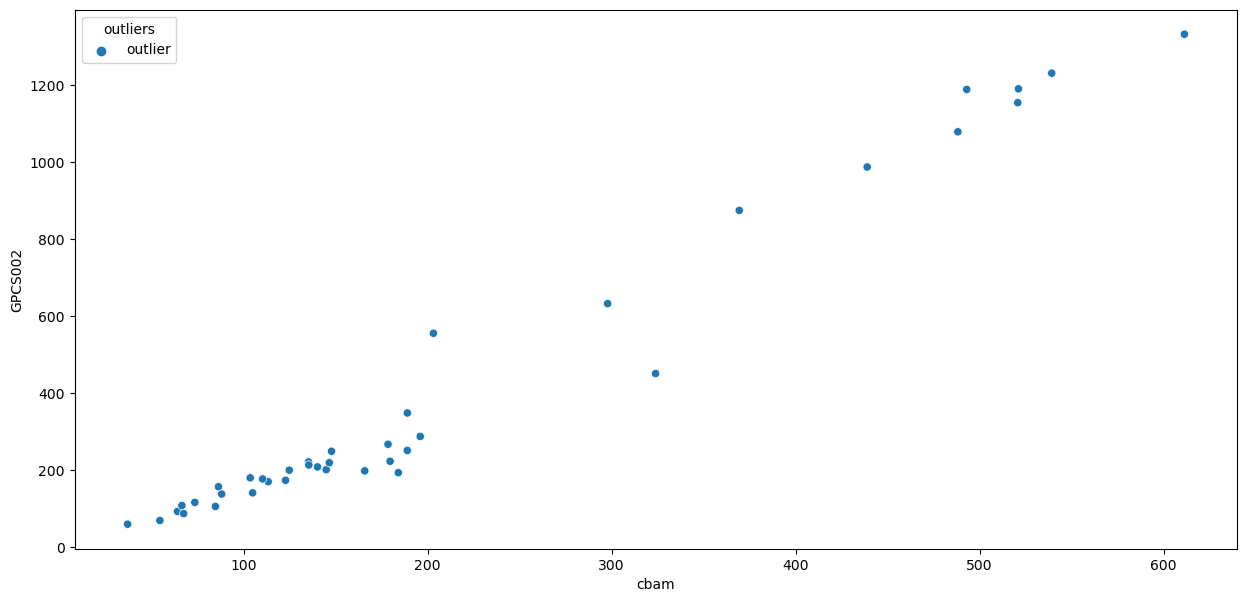

In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_excel("C:/Users/gulsh/Downloads/inout.xlsx")
# data = data[data['outliers'] == 'outlier']
fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(x='cbam',y='GPCS002',hue='outliers',data=data)

In [ ]:
import pandas as pd

# Load your data
# data = pd.read_csv("path_to_your_data.csv")

def bin_and_count(data, binning_column, bins, count_columns):
    """
    Divide data into bins based on a column and then count the number of observations 
    for other columns within those bins.

    Parameters:
    - data: DataFrame containing the data.
    - binning_column: Name of the column based on which data will be divided into bins.
    - bins: List specifying the bin edges.
    - count_columns: List of column names for which to count observations within each bin.

    Returns:
    - A DataFrame with bins as rows and count for other columns as columns.
    """
    # Create bins
    data['bin'] = pd.cut(data[binning_column], bins=bins, right=False)
    
    # Count observations for each bin
    result = data.groupby('bin')[count_columns].count().reset_index()

    return result

# Example Usage:
bins = [0, 10, 20, 30]  # Modify as per your requirements
binning_column = 'column_name_for_binning'  # Replace with the name of your column
count_columns = ['col1', 'col2', 'col3']  # Replace with the names of columns you want to count

result = bin_and_count(data, binning_column, bins, count_columns)
print(result)
